In [96]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 : Data-Preprocessing

In [64]:
def convertPpmJpg(data_dir) :
    '''Converts the .ppm format into .jpg format to make it readable for keras'''
    
    #Get to the required folder
    directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir)] 
    label_dir = []
    file_names = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        #Convert ppm to jpg and delete ppm files
        for img in file_names :
            im = Image.open(img)
            im.save(img.replace('.ppm','.jpg'))
            os.remove(img)
            
        #Delete the csv files present in every directory    
        for files in os.listdir(d) :
            if files.endswith('.csv') :
                os.remove(os.path.join(d,files))

In [62]:
#Call the function to convert ppm format to jpg format     
#convertPpmJpg('C:\\Users\\amuly\\Desktop\\Traffic Sign Detection\\datasets\\Training')                
#convertPpmJpg('C:\\Users\\amuly\\Desktop\\Traffic Sign Detection\\datasets\\Testing')

## Step 2: Exploratory Data Analysis

In [105]:
image_size = []
root = 'C:\\Users\\amuly\\Desktop\\Traffic Sign Detection\\datasets\\Training'
for d in os.listdir(root) :
    folder = os.path.join(root,d)
    for img in os.listdir(folder) :
        im = Image.open(os.path.join(folder,img))
        image_size.append(im.size)

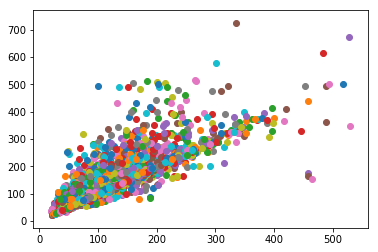

In [106]:
#Lets check out the image sizes
for sizes in image_size :
    x,y = sizes
    plt.scatter(x,y)

In [109]:
#Min size
min(image_size)

(20, 37)

In [110]:
#Max size
max(image_size)

(529, 347)

In [114]:
#average size
tuple(map(np.mean, zip(*image_size)))

(109.82601092896175, 124.97245901639344)

<Container object of 62 artists>

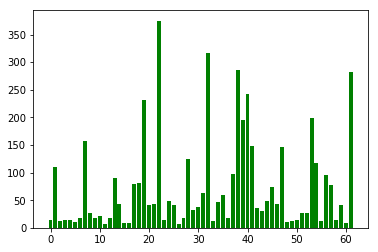

In [124]:
#No of samples in every label in the training set
sample_size = {}
for d in os.listdir(root) :
    sample_size[int(d)] = len(os.listdir(os.path.join(root,d)))

plt.bar(list(sample_size.keys()), list(sample_size.values()), color='g')

In [128]:
#Total number of samples in training set
sum(sample_size.values())

4575

In [129]:
#No of samples in every label in the testing set
root = 'C:\\Users\\amuly\\Desktop\\Traffic Sign Detection\\datasets\\Testing'
test_size = {}
for d in os.listdir(root) :
    test_size[int(d)] = len(os.listdir(os.path.join(root,d)))

In [130]:
#No of test samples
sum(list(test_size.values()))

2520

## Step 3 : CNN

In [134]:
#Initializing the CNN
classifier = Sequential()

#Convolution
#Arguments : It has 32 feature maps with 3 rows and 3 columns, expected format
#input shape = the size of the image and then  3(R,B,G)
classifier.add(Convolution2D(32, 3, 3, input_shape=(64,64,3),activation = 'relu'))

#Create the pool size of 2x2, thus dividing the vector size by 2 
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

#hidden layer
# Rule of thumb : No of hidden nodes = (op nodes + input nodes)/2, By experimenting = 128
classifier.add(Dense(output_dim = 128, activation='relu'))

#Output layer
classifier.add(Dense(output_dim = 62, activation='sigmoid'))

#Choose parameters
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\amuly\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3...)`
C:\Users\amuly\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\amuly\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=62)`


In [135]:
from keras.preprocessing.image import ImageDataGenerator

#Using Data Augmentations like rescale,shear,zoom n flip
#Rescale will scale our pizel between 0 and 255 (Similar to standardization)
#Shear_range = To apply random transformations
#Zoom and flips = zooms n flips the images
#Training and test initialization
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



#Target size is same as 64x64 we used before
#Batchsize = no of random sample size in CNN at a time
#Class = binary or more than 2 classes
train_set = train_datagen.flow_from_directory(
        'datasets/Training',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'datasets/Testing',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


#Steps per epochs = No of observation in oujr training set
#We have used 1000 to save time
#No of epochs = 25 but i used 1 to save time
#validation_steps = No of observation in oujr test set
classifier.fit_generator(
        train_set,
        steps_per_epoch=4575,
        epochs=10,
        validation_data=test_set,
        validation_steps=2520)

Found 4575 images belonging to 62 classes.
Found 2520 images belonging to 62 classes.
Epoch 1/10
2466/4575 [===============>..............] - ETA: 579s - loss: 0.3697 - acc: 0.9005

KeyboardInterrupt: 